In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()

In [3]:
y=torch.tensor([1,5,2,5]).float()

In [4]:
M1 = nn.Linear(2,8,bias=False)

In [5]:
M1(x)

tensor([[ 4.0041, -0.3190, -1.0266, -4.8569,  2.5347,  1.0956,  4.4227, -2.5389],
        [ 3.4781, -0.4867, -0.7807, -4.2314,  2.3295,  0.7057,  3.8958, -2.3319],
        [ 1.7980, -1.8202,  0.4274, -2.2816,  2.1602, -1.4764,  2.4186, -2.1523],
        [ 6.2261, -2.8019, -0.3747, -7.6905,  5.3465, -1.0029,  7.4719, -5.3396]],
       grad_fn=<MmBackward0>)

In [6]:
M2 = nn.Linear(8,1, bias=False)

In [15]:
M2(M1(x)).squeeze()

tensor([ 0.0697,  0.0438, -0.1025, -0.0757], grad_fn=<SqueezeBackward0>)

In [8]:
class MyNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1=nn.Linear(2,8,bias=False)
    self.Matrix2=nn.Linear(8,1,bias=False)
  def forward(self,x):
    x=self.Matrix1(x)
    x=self.Matrix2(x)
    return x.squeeze()

In [9]:
f=MyNeuralNetwork()


In [10]:
yhat=f(x)
yhat

tensor([ 0.6507,  0.4452, -0.6684, -0.3089], grad_fn=<SqueezeBackward0>)

In [16]:
L=nn.MSELoss()
L(y,yhat)

tensor(14.0432, grad_fn=<MseLossBackward0>)

In [17]:
opt=SGD(f.parameters(),lr=0.001)

In [20]:
losses=[]
for _ in range(50):
  opt.zero_grad()
  loss_value=L(f(x),y)
  loss_value.backward()
  opt.step()
  # print('loss_value')
  print(loss_value.item())
  losses.append(loss_value.item())

2.4028987884521484
2.402362823486328
2.401836633682251
2.401319980621338
2.4008119106292725
2.400312900543213
2.3998234272003174
2.3993422985076904
2.3988699913024902
2.3984055519104004
2.39794921875
2.397500991821289
2.397061586380005
2.396630048751831
2.396205425262451
2.3957879543304443
2.395378351211548
2.3949766159057617
2.3945813179016113
2.394192695617676
2.3938114643096924
2.3934366703033447
2.39306902885437
2.392707586288452
2.392352819442749
2.3920040130615234
2.3916618824005127
2.3913252353668213
2.3909945487976074
2.390669822692871
2.390350818634033
2.390038013458252
2.3897299766540527
2.389427900314331
2.3891310691833496
2.3888399600982666
2.3885531425476074
2.3882715702056885
2.387995719909668
2.387723922729492
2.3874571323394775
2.387195110321045
2.3869380950927734
2.3866848945617676
2.386436939239502
2.386192798614502
2.385953664779663
2.38571834564209
2.3854870796203613
2.3852601051330566


Text(0.5, 0, 'Epoch')

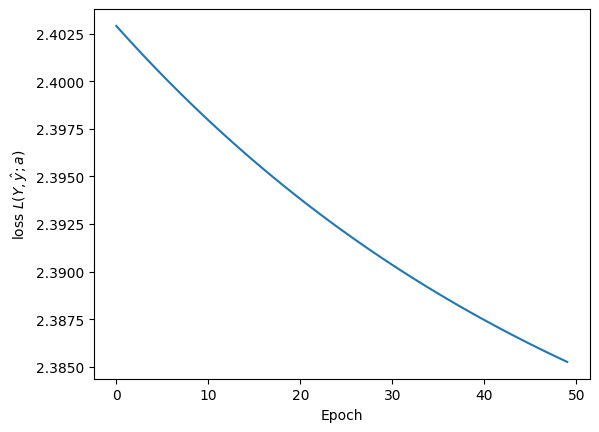

In [21]:
plt.plot(losses)
plt.ylabel('loss $L(Y,\hat{y};a)$')
plt.xlabel('Epoch')